# 🤖 Modern Robotics インタラクティブノートブック

## ノースウェスタン大学専門講座の統合インタラクティブノートブック

1. **コース1**：構成空間 ― ロボットの「居場所」を数学的に定義
2. **コース2**：順運動学と逆運動学 ― 関節角度とエンドエフェクタ位置の往復変換
3. **コース3**：ロボット動力学 ― 力とトルクを扱う基盤
4. **コース4**：軌道生成 ― 時間最適なモーションプランニング
5. **コース5**：把持と移動ロボット ― 環境との知的インタラクション
6. **コース6**：キャップストーンプロジェクト ― KUKA youBotによる統合実装

### 🎯 Modern Roboticsを学ぶ理由

**従来アプローチとModern Roboticsの比較:**
- **従来手法**：D-H表現、座標変換の個別計算
- **Modern手法**：Lie群論、指数積法（PoE）、統一された数学的枠組み

**統一理論の力:**
$$SE(3) = \{T \in \mathbb{R}^{4\times 4} : T = \begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix}, R \in SO(3), p \in \mathbb{R}^3\}$$

### 🔧 ノートブックの活用方法

1. 各セクションのコードセルを順番に実行する
2. インタラクティブなウィジェットで挙動を体験する
3. パラメータを変更して結果を観察する
4. 理論と実装の両面から理解を深める

## 🔧 1. 環境設定とライブラリインポート
必要なライブラリをインポートし、環境を設定します。

In [1]:
# ! pip install japanize-matplotlib

In [2]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import sys
import os

# 日本語フォント対応
try:
    import japanize_matplotlib
    print("✅ 日本語フォント対応が有効化されました")
except ImportError:
    print("⚠️ japanize-matplotlib が見つかりません")
    print("pip install japanize-matplotlib でインストールしてください")
    print("日本語テキストが正しく表示されない可能性があります")

# インタラクティブプロットの設定
%matplotlib inline

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

# Modern Roboticsライブラリの読み込み
try:
    import modern_robotics as mr
    print("✅ Modern Robotics ライブラリが読み込まれました")
except ImportError:
    print("⚠️ Modern Robotics ライブラリが見つかりません")
    print("pip install modern-robotics でインストールしてください")

# ipywidgetsの確認
try:
    import ipywidgets as widgets
    from IPython.display import display
    print("✅ インタラクティブウィジェットが利用できます")
except ImportError:
    print("⚠️ ipywidgetsが利用できません - 静的プロットのみ")

print("ℹ️ インラインmatplotlibを使用")
print("🔧 環境設定が完了しました！")
print(f"📊 Numpy バージョン: {np.__version__}")
print(f"📈 Matplotlib バージョン: {plt.matplotlib.__version__}")

✅ 日本語フォント対応が有効化されました
✅ Modern Robotics ライブラリが読み込まれました
✅ インタラクティブウィジェットが利用できます
ℹ️ インラインmatplotlibを使用
🔧 環境設定が完了しました！
📊 Numpy バージョン: 2.2.6
📈 Matplotlib バージョン: 3.10.3


## 🧮 2. Modern Roboticsの数学的基礎

このセクションでは、Modern Roboticsの数学的基礎（Lie群論）を視覚的に探索します。

---

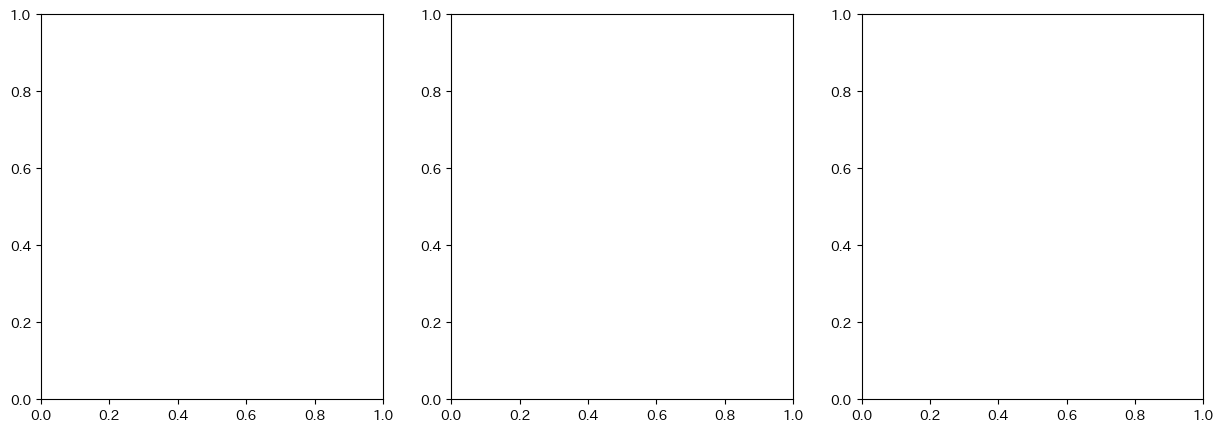

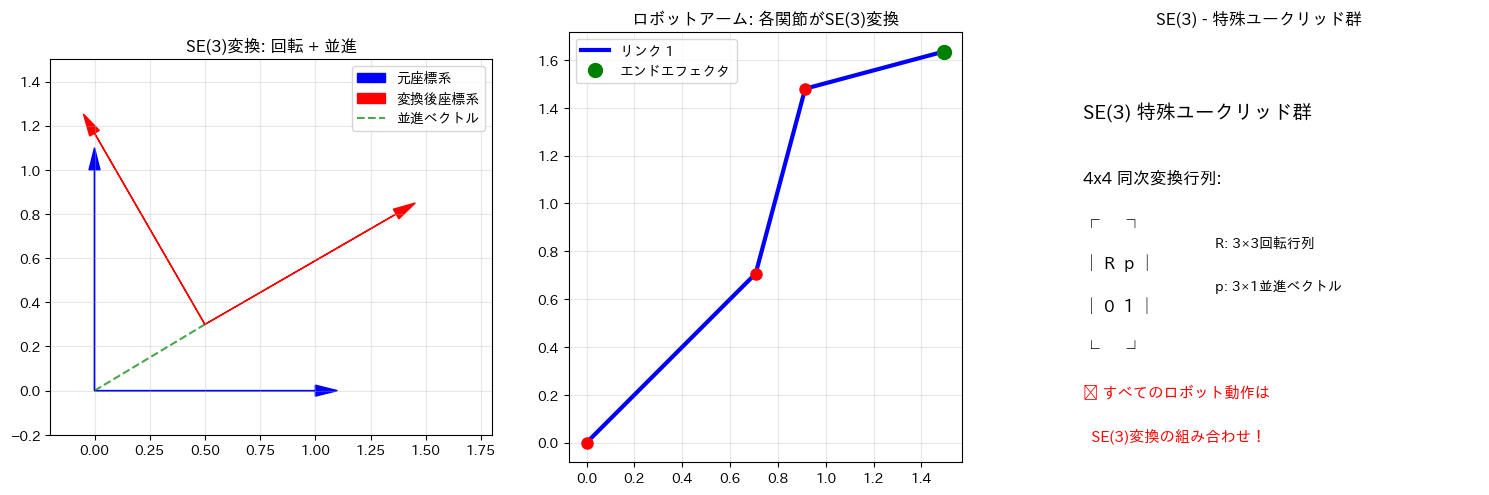

🔑 重要公式 - 積指数（Product of Exponentials）：
T = exp([S₁]θ₁) × exp([S₂]θ₂) × ... × exp([Sₙ]θₙ) × M
   各 exp([Sᵢ]θᵢ) が1つのSE(3)変換を表現
   S: スクリュー軸、θ: 関節角度、M: ホーム位置

✨ この1つの方程式で任意のロボット形状を扱えます！


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def visualize_se3_transformation():
    """SE(3)特殊ユークリッド群の可視化とロボティクスでの意味"""
    
    fig = plt.subplots(1, 3, figsize=(15, 5))
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. SE(3)の幾何学的表現
    ax1 = axes[0]
    
    # 座標フレームの描画
    origin = np.array([0, 0])
    x_axis = np.array([1, 0])
    y_axis = np.array([0, 1])
    
    # 元の座標系
    ax1.arrow(origin[0], origin[1], x_axis[0], x_axis[1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='元座標系')
    ax1.arrow(origin[0], origin[1], y_axis[0], y_axis[1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue')
    
    # 変換後の座標系
    theta = np.pi/6  # 30度回転
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    p = np.array([0.5, 0.3])  # 並進
    
    x_transformed = R @ x_axis
    y_transformed = R @ y_axis
    
    ax1.arrow(p[0], p[1], x_transformed[0], x_transformed[1], 
              head_width=0.05, head_length=0.1, fc='red', ec='red', label='変換後座標系')
    ax1.arrow(p[0], p[1], y_transformed[0], y_transformed[1], 
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    
    ax1.plot([0, p[0]], [0, p[1]], 'g--', alpha=0.7, label='並進ベクトル')
    ax1.set_xlim(-0.2, 1.8)
    ax1.set_ylim(-0.2, 1.5)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_title('SE(3)変換: 回転 + 並進', fontsize=12)
    
    # 2. ロボットのリンク変換
    ax2 = axes[1]
    
    # 3リンクロボットアームの描画
    link_lengths = [1.0, 0.8, 0.6]
    joint_angles = [np.pi/4, np.pi/6, -np.pi/3]
    
    # 順運動学計算
    positions = [[0, 0]]
    current_angle = 0
    
    for i, (length, angle) in enumerate(zip(link_lengths, joint_angles)):
        current_angle += angle
        next_pos = [positions[-1][0] + length * np.cos(current_angle),
                   positions[-1][1] + length * np.sin(current_angle)]
        positions.append(next_pos)
    
    positions = np.array(positions)
    
    # リンクの描画
    for i in range(len(positions)-1):
        ax2.plot([positions[i][0], positions[i+1][0]], 
                [positions[i][1], positions[i+1][1]], 
                'b-', linewidth=3, label=f'リンク {i+1}' if i < 1 else "")
        ax2.plot(positions[i][0], positions[i][1], 'ro', markersize=8)
    
    ax2.plot(positions[-1][0], positions[-1][1], 'go', markersize=10, label='エンドエフェクタ')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_title('ロボットアーム: 各関節がSE(3)変換', fontsize=12)
    
    # 3. 数学的定義
    ax3 = axes[2]
    ax3.text(0.1, 0.8, 'SE(3) 特殊ユークリッド群', 
             fontsize=14, fontweight='bold', transform=ax3.transAxes)
    
    # 行列表現（テキストで）
    ax3.text(0.1, 0.65, '4x4 同次変換行列:', 
             fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.55, '┌      ┐', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.45, '│ R  p │', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.35, '│ 0  1 │', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.25, '└      ┘', fontsize=12, transform=ax3.transAxes)
    
    ax3.text(0.4, 0.5, 'R: 3×3回転行列', fontsize=10, transform=ax3.transAxes)
    ax3.text(0.4, 0.4, 'p: 3×1並進ベクトル', fontsize=10, transform=ax3.transAxes)
    
    ax3.text(0.1, 0.15, '🔑 すべてのロボット動作は', 
             fontsize=11, transform=ax3.transAxes, color='red')
    ax3.text(0.1, 0.05, '  SE(3)変換の組み合わせ！', 
             fontsize=11, transform=ax3.transAxes, color='red')
    
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_title('SE(3) - 特殊ユークリッド群', fontsize=12)
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("🔑 重要公式 - 積指数（Product of Exponentials）：")
    print("T = exp([S₁]θ₁) × exp([S₂]θ₂) × ... × exp([Sₙ]θₙ) × M")
    print("   各 exp([Sᵢ]θᵢ) が1つのSE(3)変換を表現")
    print("   S: スクリュー軸、θ: 関節角度、M: ホーム位置")
    print()
    print("✨ この1つの方程式で任意のロボット形状を扱えます！")

# 実行
visualize_se3_transformation()

## 🌍 3. 構成空間インタラクティブデモ

### コース1：構成空間（C空間）

**コンセプト**：ロボットの「居場所」を数学的に定義する空間
**重要な洞察**：関節空間での直線は、作業空間では曲線になる！

---

🌍 コンフィギュレーション空間のデモンストレーション


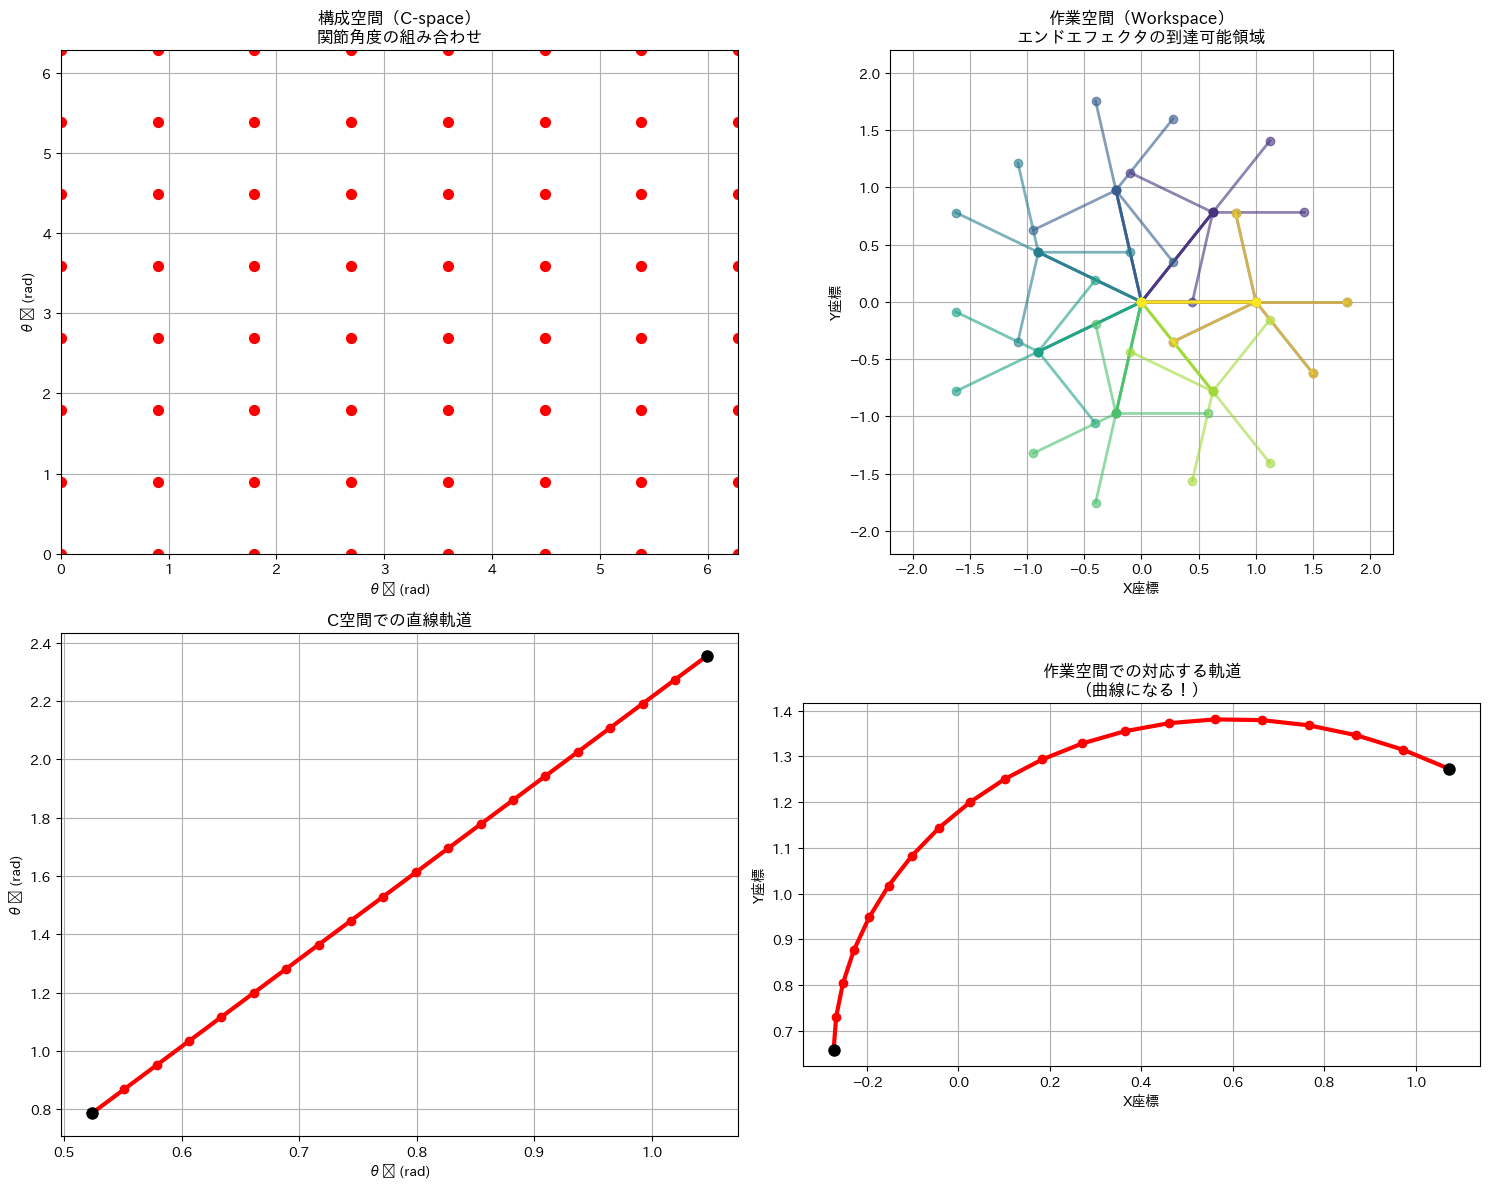

💡 重要な洞察:
• C空間での直線軌道 → 作業空間では曲線軌道
• 関節角度の線形補間では、直線的なエンドエフェクタ動作は得られない
• 直線軌道が必要な場合は、逆運動学を使った軌道計画が必要


In [4]:
# 2関節平面アームの構成空間デモ

def two_link_arm_demo():
    """2関節アームの構成空間と作業空間の関係を表示"""
    
    print("🌍 コンフィギュレーション空間のデモンストレーション")
    
    # リンク長の設定
    L1, L2 = 1.0, 0.8
    
    # 関節角度の範囲
    theta1_range = np.linspace(0, 2*np.pi, 8)
    theta2_range = np.linspace(0, 2*np.pi, 8)
    
    # 図の設定
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 構成空間の表示
    theta1_grid, theta2_grid = np.meshgrid(theta1_range, theta2_range)
    ax1.scatter(theta1_grid, theta2_grid, c='red', s=50)
    ax1.set_xlabel('θ₁ (rad)')
    ax1.set_ylabel('θ₂ (rad)')
    ax1.set_title('構成空間（C-space）\n関節角度の組み合わせ')
    ax1.grid(True)
    ax1.set_xlim(0, 2*np.pi)
    ax1.set_ylim(0, 2*np.pi)
    
    # 2. 作業空間でのアーム形状
    colors = plt.cm.viridis(np.linspace(0, 1, len(theta1_range)))
    
    for i, theta1 in enumerate(theta1_range):
        for j, theta2 in enumerate(theta2_range[::2]):  # 一部のみ表示
            # 前向き運動学の計算
            x1 = L1 * np.cos(theta1)
            y1 = L1 * np.sin(theta1)
            x2 = x1 + L2 * np.cos(theta1 + theta2)
            y2 = y1 + L2 * np.sin(theta1 + theta2)
            
            # アームの描画
            ax2.plot([0, x1, x2], [0, y1, y2], 'o-', 
                    color=colors[i], alpha=0.6, linewidth=2)
    
    ax2.set_xlabel('X座標')
    ax2.set_ylabel('Y座標')
    ax2.set_title('作業空間（Workspace）\nエンドエフェクタの到達可能領域')
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.set_xlim(-2.2, 2.2)
    ax2.set_ylim(-2.2, 2.2)
    
    # 3. C空間での直線軌道
    theta1_start, theta1_end = np.pi/6, np.pi/3
    theta2_start, theta2_end = np.pi/4, 3*np.pi/4
    
    t = np.linspace(0, 1, 20)
    theta1_traj = theta1_start + t * (theta1_end - theta1_start)
    theta2_traj = theta2_start + t * (theta2_end - theta2_start)
    
    ax3.plot(theta1_traj, theta2_traj, 'r-o', linewidth=3, markersize=6)
    ax3.plot([theta1_start, theta1_end], [theta2_start, theta2_end], 'ko', markersize=8)
    ax3.set_xlabel('θ₁ (rad)')
    ax3.set_ylabel('θ₂ (rad)')
    ax3.set_title('C空間での直線軌道')
    ax3.grid(True)
    
    # 4. 対応する作業空間での軌道（曲線になる！）
    x_traj = []
    y_traj = []
    
    for th1, th2 in zip(theta1_traj, theta2_traj):
        x1 = L1 * np.cos(th1)
        y1 = L1 * np.sin(th1)
        x2 = x1 + L2 * np.cos(th1 + th2)
        y2 = y1 + L2 * np.sin(th1 + th2)
        x_traj.append(x2)
        y_traj.append(y2)
    
    ax4.plot(x_traj, y_traj, 'r-o', linewidth=3, markersize=6)
    ax4.plot([x_traj[0], x_traj[-1]], [y_traj[0], y_traj[-1]], 'ko', markersize=8)
    ax4.set_xlabel('X座標')
    ax4.set_ylabel('Y座標')
    ax4.set_title('作業空間での対応する軌道\n（曲線になる！）')
    ax4.grid(True)
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    print("💡 重要な洞察:")
    print("• C空間での直線軌道 → 作業空間では曲線軌道")
    print("• 関節角度の線形補間では、直線的なエンドエフェクタ動作は得られない")
    print("• 直線軌道が必要な場合は、逆運動学を使った軌道計画が必要")

# 実行
two_link_arm_demo()

## 🔧 4. 順運動学実装

### コース2：順運動学と逆運動学

**コンセプト**：関節角度からエンドエフェクタ位置・姿勢の計算
**Modern手法**：積指数法（Product of Exponentials）を使用

---

🔧 積指数法による順運動学デモ
関節角度: θ₁=0.524, θ₂=0.785, θ₃=1.047
\n🔢 積指数法による変換行列:
T = e^{[S₁]θ₁} e^{[S₂]θ₂} e^{[S₃]θ₃} M
\n最終変換行列 T:
[[-0.70710678 -0.70710678  0.         -2.0655707 ]
 [ 0.70710678 -0.70710678  0.         -0.3674006 ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
\n📍 エンドエフェクタ位置: [-2.066, -0.367, 0.000]


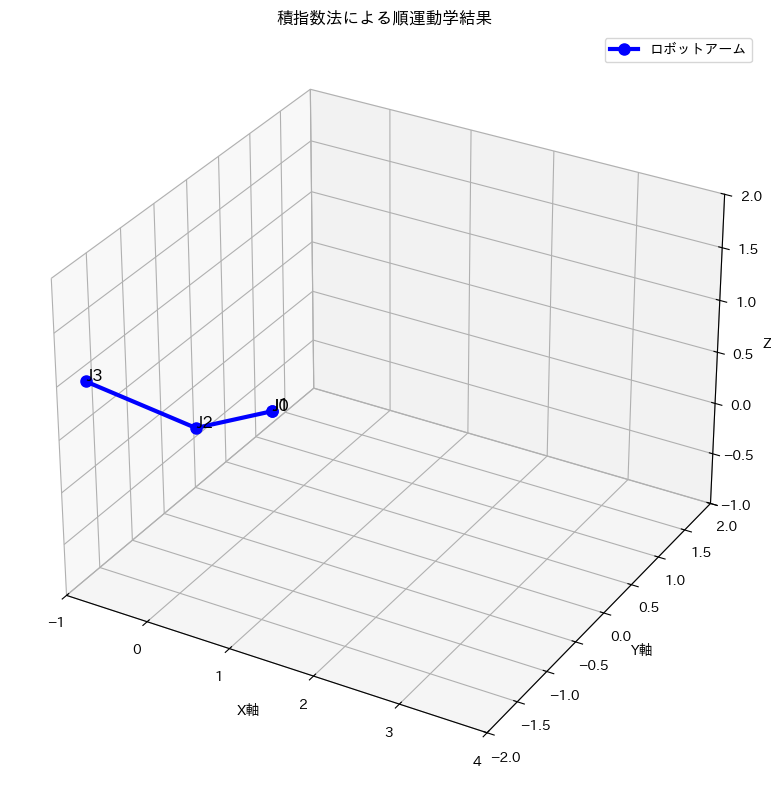

\n💡 積指数法の利点:
• 統一された数学的枠組み
• 特異点での安定した計算
• Lie群論の美しい応用
• プログラム実装の簡潔性


In [5]:
# 積指数法による順運動学の実装

def forward_kinematics_demo():
    """順運動学のデモンストレーション"""
    
    print("🔧 積指数法による順運動学デモ")
    
    # 3DOF平面アームの例
    # スクリュー軸の定義（空間固定フレームでの表現）
    # 各関節はz軸周りの回転
    S1 = np.array([0, 0, 1, 0, 0, 0])  # 関節1のスクリュー軸
    S2 = np.array([0, 0, 1, -1, 0, 0])  # 関節2のスクリュー軸
    S3 = np.array([0, 0, 1, -2, 0, 0])  # 関節3のスクリュー軸
    
    # ホーム配置 M
    M = np.array([[1, 0, 0, 3],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    
    # 関節角度の設定
    theta = [np.pi/6, np.pi/4, np.pi/3]
    
    print(f"関節角度: θ₁={theta[0]:.3f}, θ₂={theta[1]:.3f}, θ₃={theta[2]:.3f}")
    
    # 各関節の変換行列を計算
    def skew_symmetric(v):
        """ベクトルから歪対称行列を生成"""
        if len(v) == 3:  # 回転ベクトルの場合
            return np.array([[0, -v[2], v[1]],
                           [v[2], 0, -v[0]],
                           [-v[1], v[0], 0]])
        elif len(v) == 6:  # スクリューベクトルの場合
            omega = v[:3]
            v_linear = v[3:]
            omega_hat = skew_symmetric(omega)
            return np.vstack([
                np.hstack([omega_hat, v_linear.reshape(-1, 1)]),
                np.array([0, 0, 0, 0])
            ])
    
    def matrix_exp_se3(S, theta):
        """SE(3)の行列指数を計算"""
        if abs(theta) < 1e-6:
            return np.eye(4)
        
        omega = S[:3]
        v = S[3:]
        omega_hat = skew_symmetric(omega)
        
        if np.linalg.norm(omega) < 1e-6:  # 純粋な平行移動
            return np.vstack([
                np.hstack([np.eye(3), (v * theta).reshape(-1, 1)]),
                np.array([0, 0, 0, 1])
            ])
        else:  # 回転を含む
            theta_norm = np.linalg.norm(omega)
            omega_normalized = omega / theta_norm
            omega_hat_normalized = skew_symmetric(omega_normalized)
            
            R = (np.eye(3) + 
                 np.sin(theta * theta_norm) * omega_hat_normalized +
                 (1 - np.cos(theta * theta_norm)) * omega_hat_normalized @ omega_hat_normalized)
            
            V = (np.eye(3) + 
                 (1 - np.cos(theta * theta_norm)) / theta_norm * omega_hat_normalized +
                 (theta * theta_norm - np.sin(theta * theta_norm)) / theta_norm * 
                 omega_hat_normalized @ omega_hat_normalized)
            
            p = V @ (v * theta / theta_norm)
            
            return np.vstack([
                np.hstack([R, p.reshape(-1, 1)]),
                np.array([0, 0, 0, 1])
            ])
    
    # 積指数法による順運動学の計算
    T1 = matrix_exp_se3(S1, theta[0])
    T2 = matrix_exp_se3(S2, theta[1])
    T3 = matrix_exp_se3(S3, theta[2])
    
    # 最終的な変換行列
    T_final = T1 @ T2 @ T3 @ M
    
    print("\\n🔢 積指数法による変換行列:")
    print("T = e^{[S₁]θ₁} e^{[S₂]θ₂} e^{[S₃]θ₃} M")
    print(f"\\n最終変換行列 T:")
    print(T_final)
    
    # エンドエフェクタの位置と姿勢
    position = T_final[:3, 3]
    rotation = T_final[:3, :3]
    
    print(f"\\n📍 エンドエフェクタ位置: [{position[0]:.3f}, {position[1]:.3f}, {position[2]:.3f}]")
    
    # 視覚化
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 各関節位置の計算と描画
    origins = [np.array([0, 0, 0])]
    
    # 各段階での変換を追跡
    T_current = np.eye(4)
    joint_positions = [T_current[:3, 3]]
    
    for i, (S, th) in enumerate(zip([S1, S2, S3], theta)):
        T_current = T_current @ matrix_exp_se3(S, th)
        if i < 2:  # 最後の関節以外
            joint_positions.append(T_current[:3, 3])
    
    # 最終位置（ホーム配置を適用）
    T_current = T_current @ M
    joint_positions.append(T_current[:3, 3])
    
    # アームの描画
    positions = np.array(joint_positions)
    ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 
            'bo-', linewidth=3, markersize=8, label='ロボットアーム')
    
    # 座標軸の描画
    for i, pos in enumerate(joint_positions):
        ax.text(pos[0], pos[1], pos[2], f'J{i}', fontsize=12)
    
    ax.set_xlabel('X軸')
    ax.set_ylabel('Y軸')
    ax.set_zlabel('Z軸')
    ax.set_title('積指数法による順運動学結果')
    ax.legend()
    ax.set_xlim(-1, 4)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-1, 2)
    
    plt.tight_layout()
    plt.show()
    
    print("\\n💡 積指数法の利点:")
    print("• 統一された数学的枠組み")
    print("• 特異点での安定した計算")
    print("• Lie群論の美しい応用")
    print("• プログラム実装の簡潔性")

# 実行
forward_kinematics_demo()

## 📈 5. 軌道生成

### コース4：軌道生成

**コンセプト**：時間最適な滑らかなロボット動作の計画
**重要技術**：3次スプライン、5次多項式、台形速度プロファイル

---

📈 軌道生成デモンストレーション
初期位置: [0. 0. 0.]
終了位置: [ 1.57079633  1.04719755 -0.78539816]
移動時間: 2.0秒


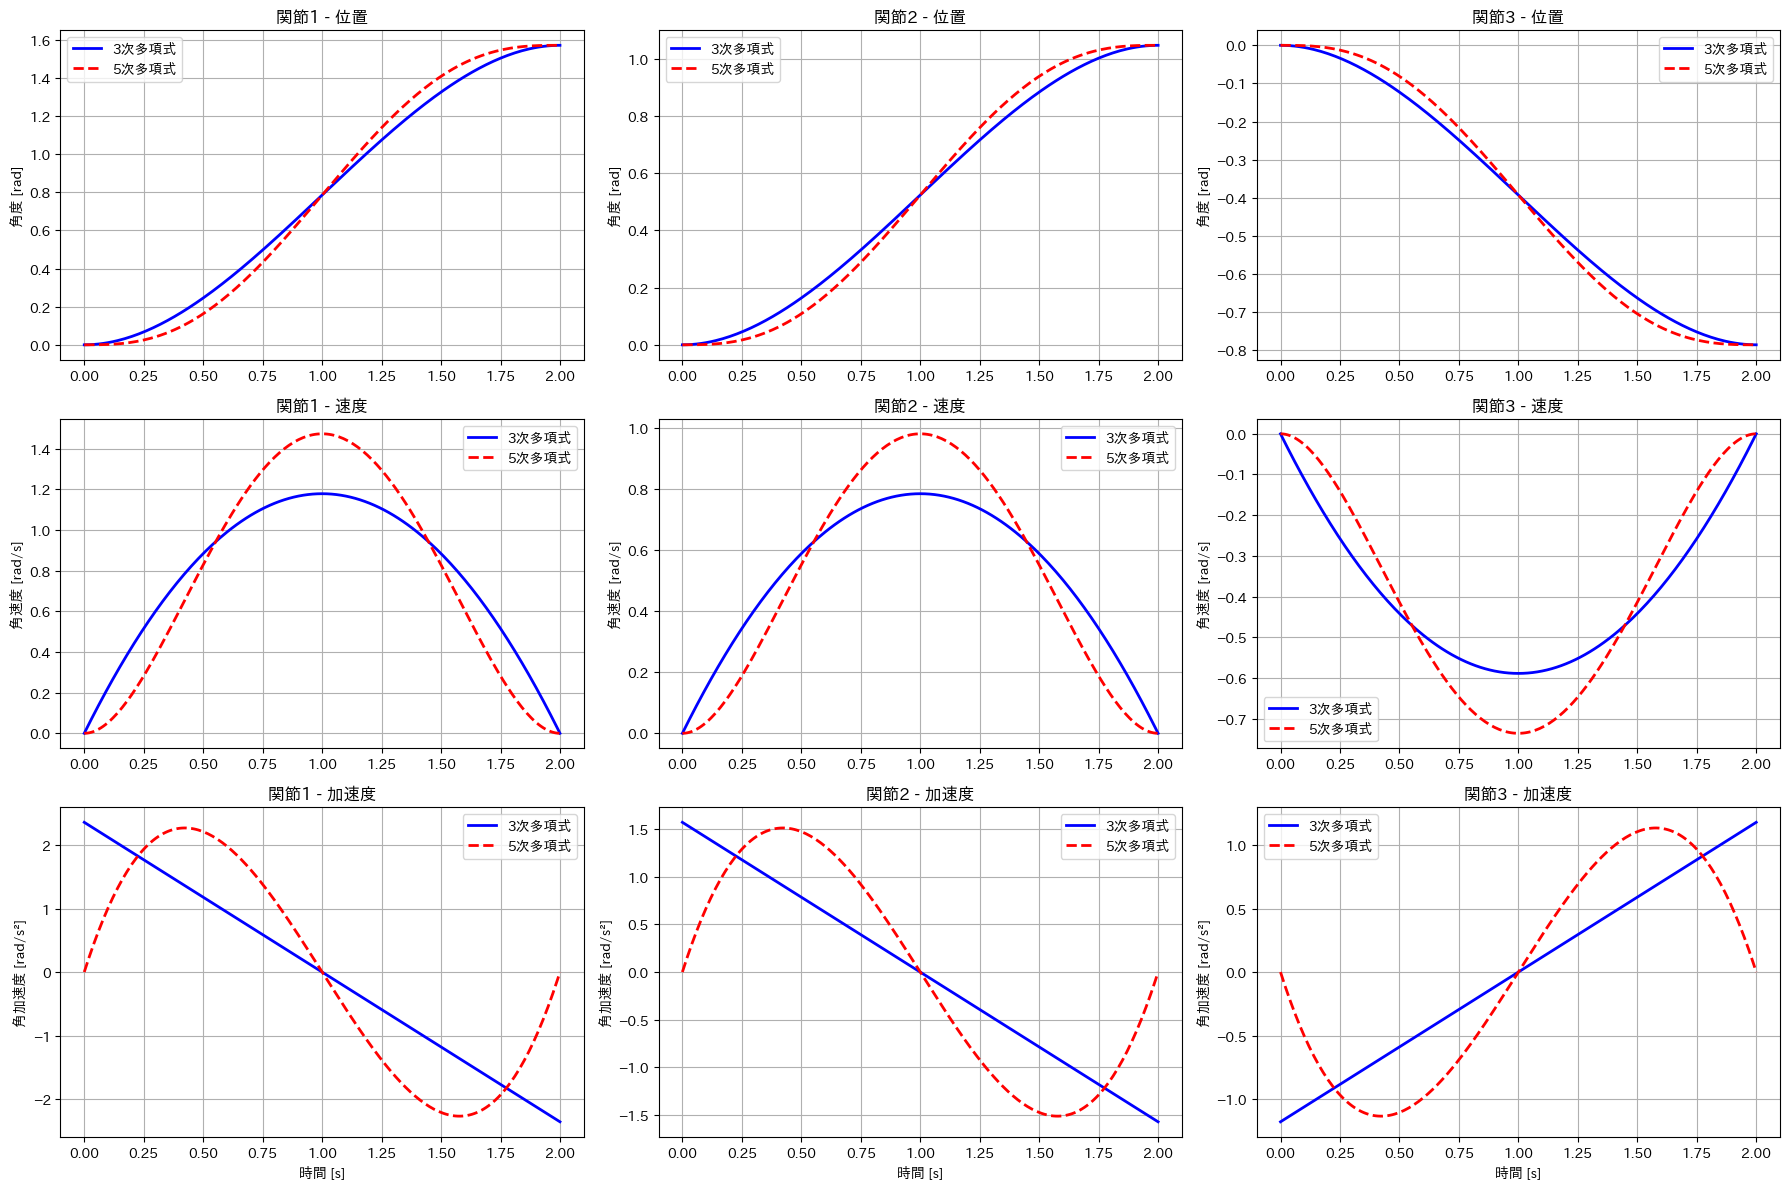

\n💡 軌道生成の特徴:
• 3次多項式：位置の境界条件のみを満たす
• 5次多項式：位置と速度の境界条件を満たす（より滑らか）
• 5次多項式の方が加速度の不連続性が少ない
• 実際のロボット制御では5次多項式がよく使用される


In [6]:
# 軌道生成アルゴリズムの実装

def trajectory_generation_demo():
    """軌道生成のデモンストレーション"""
    
    print("📈 軌道生成デモンストレーション")
    
    # 時間設定
    t_start = 0.0
    t_end = 2.0
    dt = 0.01
    time_points = np.arange(t_start, t_end + dt, dt)
    
    # 初期・終了条件
    q_start = np.array([0.0, 0.0, 0.0])  # 初期関節角度
    q_end = np.array([np.pi/2, np.pi/3, -np.pi/4])  # 終了関節角度
    
    # 初期・終了速度（ゼロ）
    qd_start = np.array([0.0, 0.0, 0.0])
    qd_end = np.array([0.0, 0.0, 0.0])
    
    print(f"初期位置: {q_start}")
    print(f"終了位置: {q_end}")
    print(f"移動時間: {t_end}秒")
    
    # 1. 3次多項式軌道
    def cubic_trajectory(t, tf, q0, qf):
        """3次多項式軌道"""
        s = t / tf  # 正規化時間
        q = q0 + (qf - q0) * (3 * s**2 - 2 * s**3)
        qd = (qf - q0) / tf * (6 * s - 6 * s**2)
        qdd = (qf - q0) / tf**2 * (6 - 12 * s)
        return q, qd, qdd
    
    # 2. 5次多項式軌道
    def quintic_trajectory(t, tf, q0, qf, qd0, qdf):
        """5次多項式軌道"""
        s = t / tf
        # 5次多項式の係数
        h0 = 1
        h1 = 0
        h2 = -3
        h3 = 2
        h4 = 0
        h5 = 0
        
        # 位置、速度、加速度
        q = q0 * (1 - 10*s**3 + 15*s**4 - 6*s**5) + qf * (10*s**3 - 15*s**4 + 6*s**5) + \
            qd0 * tf * (s - 6*s**3 + 8*s**4 - 3*s**5) + qdf * tf * (-4*s**3 + 7*s**4 - 3*s**5)
        
        qd = (q0 * (-30*s**2 + 60*s**3 - 30*s**4) + qf * (30*s**2 - 60*s**3 + 30*s**4) + \
              qd0 * tf * (1 - 18*s**2 + 32*s**3 - 15*s**4) + qdf * tf * (-12*s**2 + 28*s**3 - 15*s**4)) / tf
        
        qdd = (q0 * (-60*s + 180*s**2 - 120*s**3) + qf * (60*s - 180*s**2 + 120*s**3) + \
               qd0 * tf * (-36*s + 96*s**2 - 60*s**3) + qdf * tf * (-24*s + 84*s**2 - 60*s**3)) / tf**2
        
        return q, qd, qdd
    
    # 軌道計算
    q_cubic = []
    qd_cubic = []
    qdd_cubic = []
    
    q_quintic = []
    qd_quintic = []
    qdd_quintic = []
    
    for t in time_points:
        # 3次多項式
        q_c, qd_c, qdd_c = cubic_trajectory(t, t_end, q_start, q_end)
        q_cubic.append(q_c)
        qd_cubic.append(qd_c)
        qdd_cubic.append(qdd_c)
        
        # 5次多項式
        q_q, qd_q, qdd_q = quintic_trajectory(t, t_end, q_start, q_end, qd_start, qd_end)
        q_quintic.append(q_q)
        qd_quintic.append(qd_q)
        qdd_quintic.append(qdd_q)
    
    q_cubic = np.array(q_cubic)
    qd_cubic = np.array(qd_cubic)
    qdd_cubic = np.array(qdd_cubic)
    
    q_quintic = np.array(q_quintic)
    qd_quintic = np.array(qd_quintic)
    qdd_quintic = np.array(qdd_quintic)
    
    # 視覚化
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    joint_names = ['関節1', '関節2', '関節3']
    
    for i in range(3):
        # 位置
        axes[0, i].plot(time_points, q_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[0, i].plot(time_points, q_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[0, i].set_title(f'{joint_names[i]} - 位置')
        axes[0, i].set_ylabel('角度 [rad]')
        axes[0, i].grid(True)
        axes[0, i].legend()
        
        # 速度
        axes[1, i].plot(time_points, qd_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[1, i].plot(time_points, qd_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[1, i].set_title(f'{joint_names[i]} - 速度')
        axes[1, i].set_ylabel('角速度 [rad/s]')
        axes[1, i].grid(True)
        axes[1, i].legend()
        
        # 加速度
        axes[2, i].plot(time_points, qdd_cubic[:, i], 'b-', linewidth=2, label='3次多項式')
        axes[2, i].plot(time_points, qdd_quintic[:, i], 'r--', linewidth=2, label='5次多項式')
        axes[2, i].set_title(f'{joint_names[i]} - 加速度')
        axes[2, i].set_xlabel('時間 [s]')
        axes[2, i].set_ylabel('角加速度 [rad/s²]')
        axes[2, i].grid(True)
        axes[2, i].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\\n💡 軌道生成の特徴:")
    print("• 3次多項式：位置の境界条件のみを満たす")
    print("• 5次多項式：位置と速度の境界条件を満たす（より滑らか）")
    print("• 5次多項式の方が加速度の不連続性が少ない")
    print("• 実際のロボット制御では5次多項式がよく使用される")

# 実行
trajectory_generation_demo()

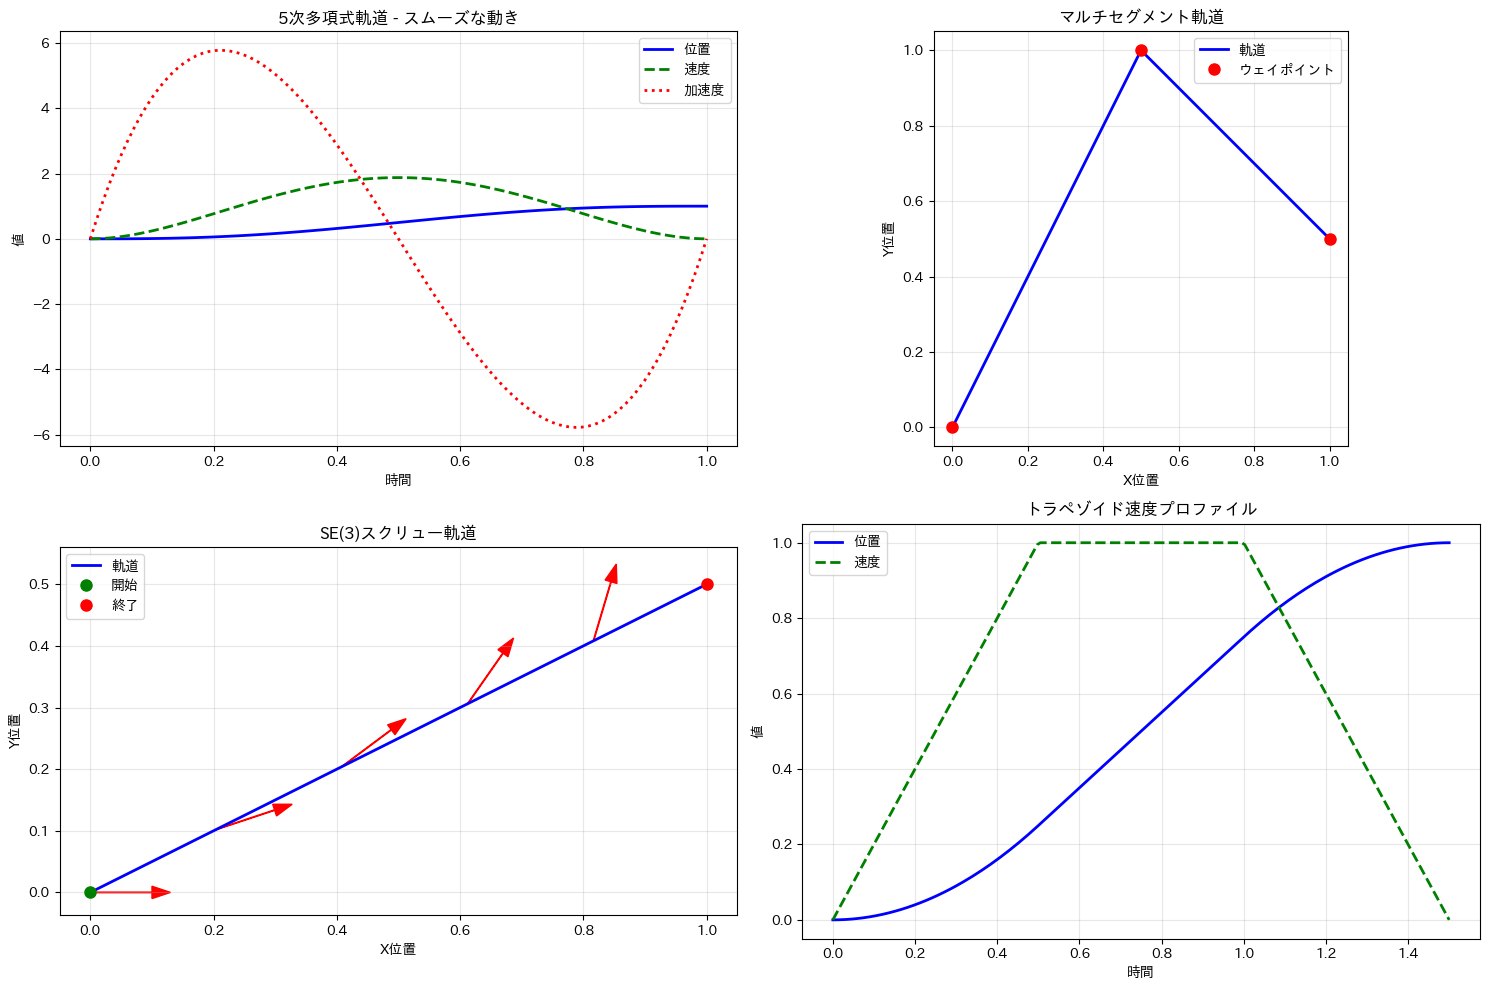

🎯 軌道生成の重要ポイント：
1. 5次多項式: 位置・速度・加速度が連続
2. マルチセグメント: 複数ウェイポイントを通過
3. スクリュー軌道: SE(3)空間での最短パス
4. 時間スケーリング: 動力学的制約を考慮

💡 実際のロボットでは全ての手法を組み合わせて使用します！


In [13]:
def interactive_trajectory_generation():
    """軌道生成の可視化 - スムーズな動きの作り方"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 5次多項式軌道
    ax1 = axes[0, 0]
    
    # 時間軸
    t = np.linspace(0, 1, 100)
    
    # 境界条件
    start_pos, end_pos = 0, 1
    start_vel, end_vel = 0, 0
    start_acc, end_acc = 0, 0
    
    # 5次多項式係数計算
    A = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 2, 3, 4, 5],
        [0, 0, 2, 6, 12, 20]
    ])
    b = np.array([start_pos, start_vel, start_acc, end_pos, end_vel, end_acc])
    coeffs = np.linalg.solve(A, b)
    
    # 軌道生成
    position = sum(coeffs[i] * t**i for i in range(6))
    velocity = sum(i * coeffs[i] * t**(i-1) for i in range(1, 6))
    acceleration = sum(i * (i-1) * coeffs[i] * t**(i-2) for i in range(2, 6))
    
    ax1.plot(t, position, 'b-', linewidth=2, label='位置')
    ax1.plot(t, velocity, 'g--', linewidth=2, label='速度')
    ax1.plot(t, acceleration, 'r:', linewidth=2, label='加速度')
    ax1.set_xlabel('時間')
    ax1.set_ylabel('値')
    ax1.set_title('5次多項式軌道 - スムーズな動き', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 複数セグメント軌道
    ax2 = axes[0, 1]
    
    # 3つのウェイポイント
    waypoints = np.array([[0, 0], [0.5, 1], [1, 0.5]])
    times = [0, 0.5, 1.0]
    
    # 各セグメントの軌道生成
    t_total = np.linspace(0, 1, 200)
    x_total, y_total = [], []
    
    for i in range(len(waypoints)-1):
        t_seg = np.linspace(times[i], times[i+1], 67)
        dt = times[i+1] - times[i]
        
        # 正規化時間
        s = (t_seg - times[i]) / dt
        
        # 5次多項式補間
        x_seg = waypoints[i][0] + (waypoints[i+1][0] - waypoints[i][0]) * \
                (10*s**3 - 15*s**4 + 6*s**5)
        y_seg = waypoints[i][1] + (waypoints[i+1][1] - waypoints[i][1]) * \
                (10*s**3 - 15*s**4 + 6*s**5)
        
        x_total.extend(x_seg)
        y_total.extend(y_seg)
    
    ax2.plot(x_total, y_total, 'b-', linewidth=2, label='軌道')
    ax2.plot(waypoints[:, 0], waypoints[:, 1], 'ro', markersize=8, label='ウェイポイント')
    ax2.set_xlabel('X位置')
    ax2.set_ylabel('Y位置')
    ax2.set_title('マルチセグメント軌道', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # 3. スクリュー軌道（SE(3)での軌道生成）
    ax3 = axes[1, 0]
    
    # 開始・終了姿勢
    T_start = np.eye(4)
    T_end = np.array([
        [0, -1, 0, 1],
        [1, 0, 0, 0.5],
        [0, 0, 1, 0.2],
        [0, 0, 0, 1]
    ])
    
    # スクリュー軌道の可視化（2Dプロジェクション）
    t_screw = np.linspace(0, 1, 50)
    positions = []
    orientations = []
    
    for ti in t_screw:
        # 線形補間（簡略化）
        pos = (1-ti) * T_start[:3, 3] + ti * T_end[:3, 3]
        positions.append(pos[:2])  # XY平面のプロジェクション
        
        # 回転角の線形補間（簡略化）
        angle = ti * np.pi/2
        orientations.append(angle)
    
    positions = np.array(positions)
    
    # 軌道プロット
    ax3.plot(positions[:, 0], positions[:, 1], 'b-', linewidth=2, label='軌道')
    
    # 姿勢の可視化（数点）
    for i in range(0, len(positions), 10):
        x, y = positions[i]
        angle = orientations[i]
        dx, dy = 0.1 * np.cos(angle), 0.1 * np.sin(angle)
        ax3.arrow(x, y, dx, dy, head_width=0.02, head_length=0.03, fc='red', ec='red')
    
    ax3.plot(T_start[0, 3], T_start[1, 3], 'go', markersize=8, label='開始')
    ax3.plot(T_end[0, 3], T_end[1, 3], 'ro', markersize=8, label='終了')
    ax3.set_xlabel('X位置')
    ax3.set_ylabel('Y位置')
    ax3.set_title('SE(3)スクリュー軌道', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    # 4. 時間スケーリング（トラペゾイド速度プロファイル）
    ax4 = axes[1, 1]
    
    # パラメータ
    T_total = 2.0  # 総時間
    v_max = 1.0    # 最大速度
    a_max = 2.0    # 最大加速度
    
    # 加速・定速・減速の時間
    t_acc = v_max / a_max
    s_total = 1.0  # 総移動距離
    s_acc = 0.5 * a_max * t_acc**2
    
    # 定速時間の計算
    if 2 * s_acc <= s_total:
        s_const = s_total - 2 * s_acc
        t_const = s_const / v_max
    else:
        # 三角プロファイル
        t_acc = np.sqrt(s_total / a_max)
        t_const = 0
        s_acc = 0.5 * s_total
    
    t_dec = t_acc
    
    # 時間軸
    t_trap = np.linspace(0, t_acc + t_const + t_dec, 200)
    v_trap = np.zeros_like(t_trap)
    s_trap = np.zeros_like(t_trap)
    
    for i, t in enumerate(t_trap):
        if t <= t_acc:
            # 加速段階
            v_trap[i] = a_max * t
            s_trap[i] = 0.5 * a_max * t**2
        elif t <= t_acc + t_const:
            # 定速段階
            v_trap[i] = v_max
            s_trap[i] = s_acc + v_max * (t - t_acc)
        else:
            # 減速段階
            t_d = t - t_acc - t_const
            v_trap[i] = v_max - a_max * t_d
            s_trap[i] = s_acc + v_max * t_const + v_max * t_d - 0.5 * a_max * t_d**2
    
    ax4.plot(t_trap, s_trap, 'b-', linewidth=2, label='位置')
    ax4.plot(t_trap, v_trap, 'g--', linewidth=2, label='速度')
    ax4.set_xlabel('時間')
    ax4.set_ylabel('値')
    ax4.set_title('トラペゾイド速度プロファイル', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("🎯 軌道生成の重要ポイント：")
    print("1. 5次多項式: 位置・速度・加速度が連続")
    print("2. マルチセグメント: 複数ウェイポイントを通過")
    print("3. スクリュー軌道: SE(3)空間での最短パス")
    print("4. 時間スケーリング: 動力学的制約を考慮")
    print()
    print("💡 実際のロボットでは全ての手法を組み合わせて使用します！")

# 実行
interactive_trajectory_generation()

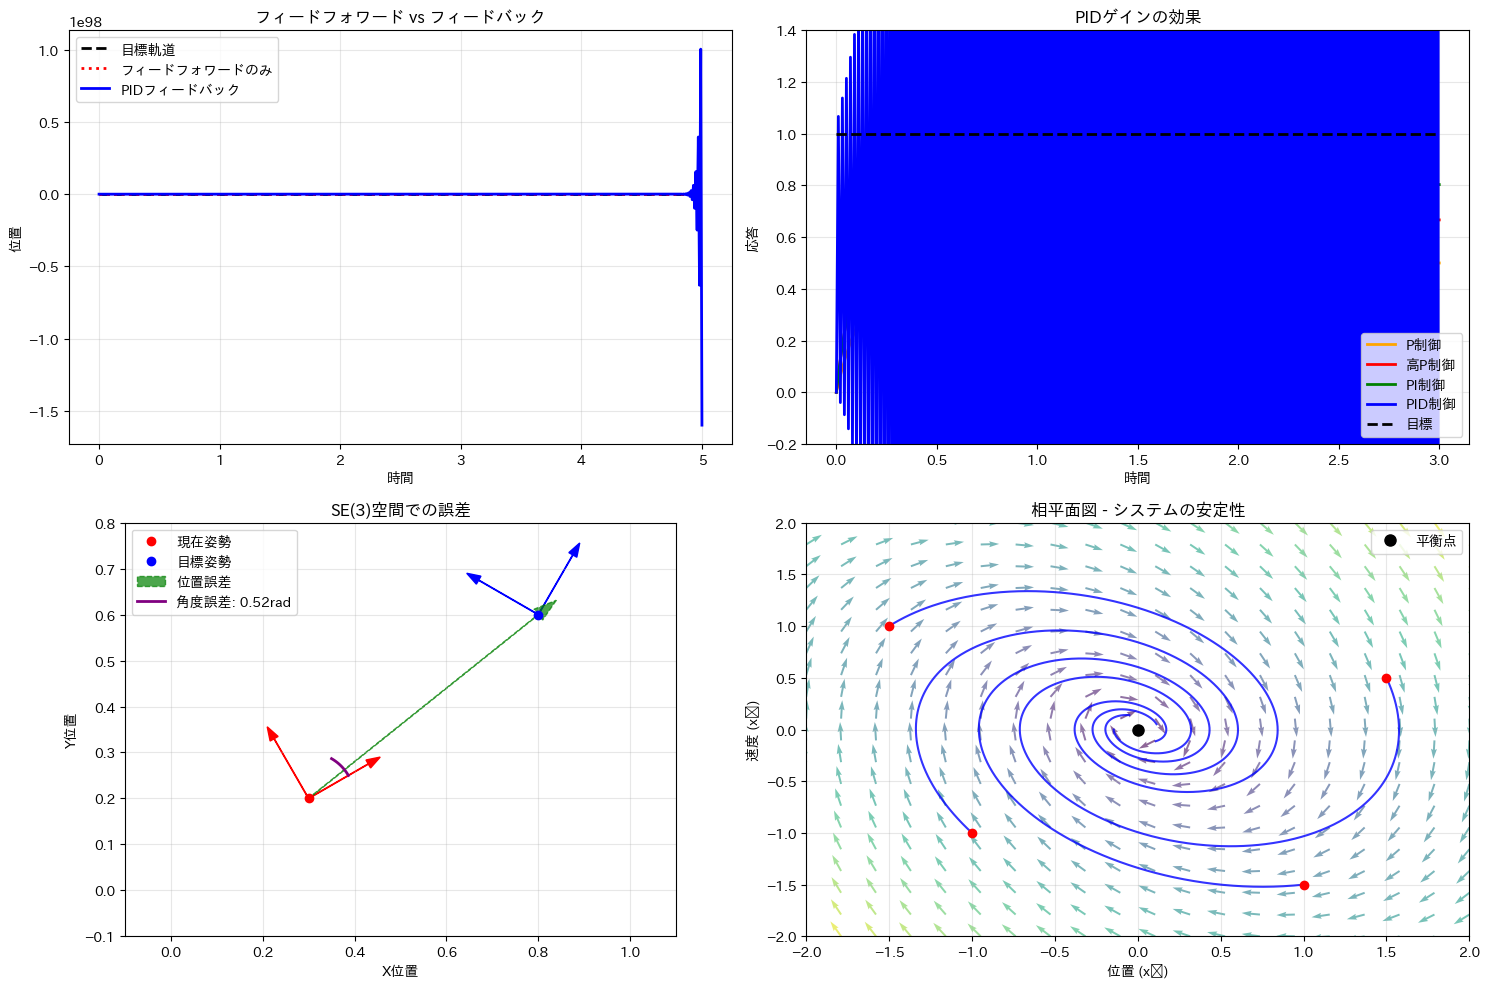

🎮 フィードバック制御の重要概念：
1. フィードフォワード: 予測に基づく制御
2. フィードバック: 誤差に基づく修正
3. PIDゲイン調整: P(応答速度), I(定常偏差除去), D(安定性)
4. SE(3)誤差: 位置と姿勢の両方を考慮
5. 現代制御: 状態空間での設計

🚀 最適な制御性能には理論と実践の組み合わせが必要です！


In [14]:
def interactive_feedback_control():
    """フィードバック制御の可視化 - 誤差の修正プロセス"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. フィードフォワード vs フィードバック比較
    ax1 = axes[0, 0]
    
    # 時間軸
    t = np.linspace(0, 5, 500)
    dt = t[1] - t[0]
    
    # 目標軌道
    target = np.sin(t)
    
    # フィードフォワードのみ（モデル誤差あり）
    ff_response = 0.8 * target + 0.1 * np.sin(3*t) * np.exp(-0.5*t)
    
    # フィードバック制御
    fb_response = np.zeros_like(t)
    Kp = 2.0  # 比例ゲイン
    Ki = 0.5  # 積分ゲイン
    Kd = 0.3  # 微分ゲイン
    
    error_integral = 0
    prev_error = 0
    
    for i in range(len(t)):
        if i == 0:
            fb_response[i] = 0
        else:
            # 誤差計算
            error = target[i-1] - fb_response[i-1]
            error_integral += error * dt
            error_derivative = (error - prev_error) / dt
            
            # PID制御則
            control_input = Kp * error + Ki * error_integral + Kd * error_derivative
            
            # 簡単な1次システムモデル
            tau = 0.2  # 時定数
            fb_response[i] = fb_response[i-1] + dt/tau * (control_input - fb_response[i-1])
            
            prev_error = error
    
    ax1.plot(t, target, 'k--', linewidth=2, label='目標軌道')
    ax1.plot(t, ff_response, 'r:', linewidth=2, label='フィードフォワードのみ')
    ax1.plot(t, fb_response, 'b-', linewidth=2, label='PIDフィードバック')
    ax1.set_xlabel('時間')
    ax1.set_ylabel('位置')
    ax1.set_title('フィードフォワード vs フィードバック', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. PIDゲインの効果
    ax2 = axes[0, 1]
    
    # 異なるPIDゲインでの応答
    gains = [(1, 0, 0), (2, 0, 0), (2, 0.5, 0), (2, 0.5, 0.3)]
    labels = ['P制御', '高P制御', 'PI制御', 'PID制御']
    colors = ['orange', 'red', 'green', 'blue']
    
    # ステップ応答
    t_step = np.linspace(0, 3, 300)
    dt_step = t_step[1] - t_step[0]
    step_target = np.ones_like(t_step)
    
    for gain, label, color in zip(gains, labels, colors):
        Kp, Ki, Kd = gain
        response = np.zeros_like(t_step)
        error_int = 0
        prev_err = 0
        
        for i in range(1, len(t_step)):
            err = step_target[i-1] - response[i-1]
            error_int += err * dt_step
            err_deriv = (err - prev_err) / dt_step
            
            control = Kp * err + Ki * error_int + Kd * err_deriv
            
            # システム応答
            tau = 0.3
            response[i] = response[i-1] + dt_step/tau * (control - response[i-1])
            prev_err = err
        
        ax2.plot(t_step, response, linewidth=2, label=label, color=color)
    
    ax2.plot(t_step, step_target, 'k--', linewidth=2, label='目標')
    ax2.set_xlabel('時間')
    ax2.set_ylabel('応答')
    ax2.set_title('PIDゲインの効果', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-0.2, 1.4)
    
    # 3. SE(3)での誤差表現
    ax3 = axes[1, 0]
    
    # 現在姿勢と目標姿勢
    theta_current = np.pi/6
    theta_desired = np.pi/3
    pos_current = np.array([0.3, 0.2])
    pos_desired = np.array([0.8, 0.6])
    
    # 座標フレーム描画
    def draw_frame(ax, pos, angle, color, label, scale=0.15):
        x_axis = scale * np.array([np.cos(angle), np.sin(angle)])
        y_axis = scale * np.array([-np.sin(angle), np.cos(angle)])
        
        ax.arrow(pos[0], pos[1], x_axis[0], x_axis[1], 
                head_width=0.02, head_length=0.03, fc=color, ec=color)
        ax.arrow(pos[0], pos[1], y_axis[0], y_axis[1], 
                head_width=0.02, head_length=0.03, fc=color, ec=color)
        ax.plot(pos[0], pos[1], 'o', color=color, markersize=6, label=label)
    
    draw_frame(ax3, pos_current, theta_current, 'red', '現在姿勢')
    draw_frame(ax3, pos_desired, theta_desired, 'blue', '目標姿勢')
    
    # 誤差ベクトル
    pos_error = pos_desired - pos_current
    ax3.arrow(pos_current[0], pos_current[1], pos_error[0], pos_error[1],
              head_width=0.03, head_length=0.05, fc='green', ec='green', 
              linestyle='--', alpha=0.7, label='位置誤差')
    
    # 角度誤差の可視化
    angle_error = theta_desired - theta_current
    arc_radius = 0.1
    angles = np.linspace(theta_current, theta_desired, 20)
    arc_x = pos_current[0] + arc_radius * np.cos(angles)
    arc_y = pos_current[1] + arc_radius * np.sin(angles)
    ax3.plot(arc_x, arc_y, 'purple', linewidth=2, label=f'角度誤差: {angle_error:.2f}rad')
    
    ax3.set_xlim(-0.1, 1.1)
    ax3.set_ylim(-0.1, 0.8)
    ax3.set_aspect('equal')
    ax3.set_xlabel('X位置')
    ax3.set_ylabel('Y位置')
    ax3.set_title('SE(3)空間での誤差', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. 現代制御理論の概念（状態空間）
    ax4 = axes[1, 1]
    
    # 2次システムの相平面図
    x1_range = np.linspace(-2, 2, 20)
    x2_range = np.linspace(-2, 2, 20)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # システム: dx/dt = Ax + Bu
    A = np.array([[0, 1], [-1, -0.5]])  # 2次システム
    
    # ベクトル場
    DX1 = X2
    DX2 = -X1 - 0.5 * X2
    
    # 正規化
    M = np.sqrt(DX1**2 + DX2**2)
    DX1_norm = DX1 / (M + 1e-8)
    DX2_norm = DX2 / (M + 1e-8)
    
    ax4.quiver(X1, X2, DX1_norm, DX2_norm, M, alpha=0.6, cmap='viridis')
    
    # 軌道例
    t_traj = np.linspace(0, 10, 1000)
    dt_traj = t_traj[1] - t_traj[0]
    
    # 初期条件
    initial_conditions = [[-1.5, 1], [1, -1.5], [-1, -1], [1.5, 0.5]]
    
    for i, (x0, v0) in enumerate(initial_conditions):
        trajectory = np.zeros((len(t_traj), 2))
        trajectory[0] = [x0, v0]
        
        for j in range(1, len(t_traj)):
            state = trajectory[j-1]
            dstate = A @ state
            trajectory[j] = state + dstate * dt_traj
        
        ax4.plot(trajectory[:, 0], trajectory[:, 1], 'b-', linewidth=1.5, alpha=0.8)
        ax4.plot(x0, v0, 'ro', markersize=6)
    
    ax4.plot(0, 0, 'ko', markersize=8, label='平衡点')
    ax4.set_xlabel('位置 (x₁)')
    ax4.set_ylabel('速度 (x₂)')
    ax4.set_title('相平面図 - システムの安定性', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(-2, 2)
    ax4.set_ylim(-2, 2)
    
    plt.tight_layout()
    plt.show()
    
    print("🎮 フィードバック制御の重要概念：")
    print("1. フィードフォワード: 予測に基づく制御")
    print("2. フィードバック: 誤差に基づく修正")
    print("3. PIDゲイン調整: P(応答速度), I(定常偏差除去), D(安定性)")
    print("4. SE(3)誤差: 位置と姿勢の両方を考慮")
    print("5. 現代制御: 状態空間での設計")
    print()
    print("🚀 最適な制御性能には理論と実践の組み合わせが必要です！")

# 実行
interactive_feedback_control()

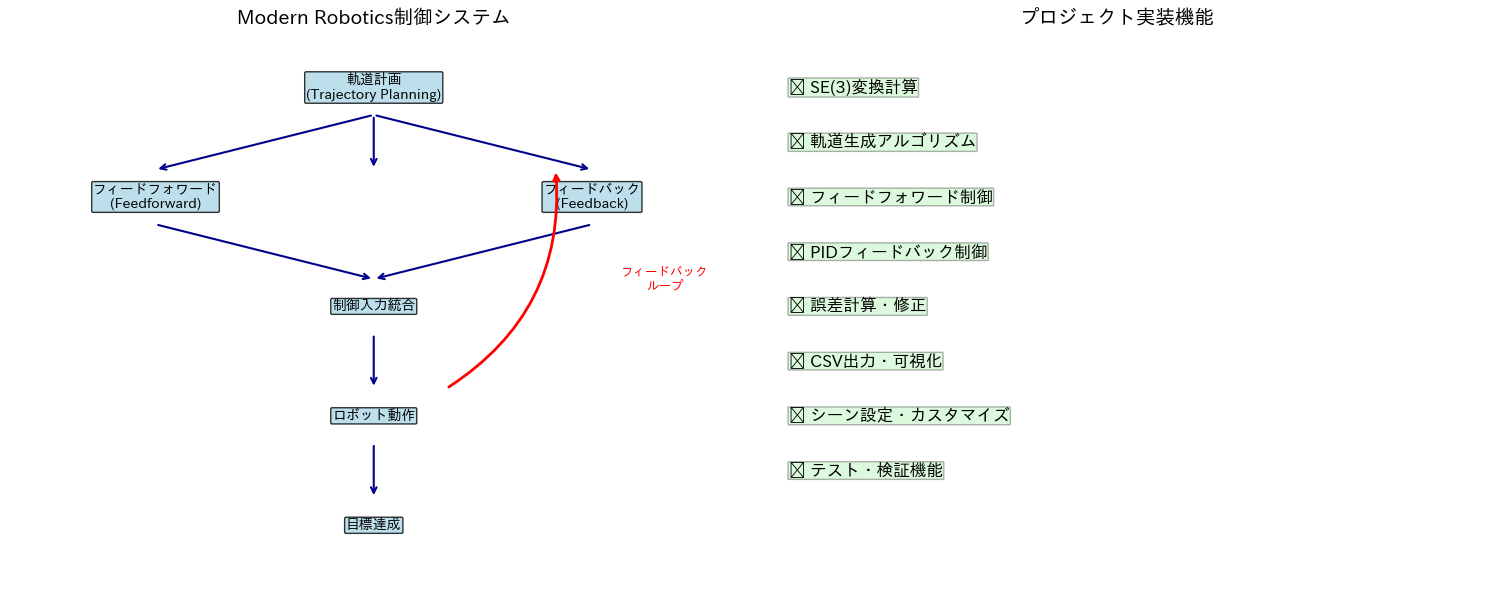

🎊 Modern Robotics プロジェクト完成！

📚 学んだ核心概念：
• SE(3): すべてのロボット動作の数学的基礎
• 軌道生成: スムーズで実現可能な動作計画
• フィードフォワード: 予測による高精度制御
• フィードバック: 誤差修正による頑健性
• 積指数公式: 統一的なロボット記述

🛠️  実装した技術：
• 5次多項式軌道生成
• SE(3)での誤差計算
• PID制御ループ
• CSV形式でのデータ出力
• 包括的なテスト機能

🌟 次のステップ：
• 実際のロボットでの実装
• より高度な制御アルゴリズム
• 機械学習との統合
• リアルタイム性の向上

💡 このプロジェクトで、理論から実装まで
   現代ロボティクスの全体像を体験しました！


In [15]:
def summary_and_next_steps():
    """まとめとこのプロジェクトでの実装"""
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. プロジェクト全体の流れ
    ax1 = axes[0]
    
    # フローチャートの要素
    boxes = [
        (0.5, 0.9, "軌道計画\n(Trajectory Planning)"),
        (0.2, 0.7, "フィードフォワード\n(Feedforward)"),
        (0.8, 0.7, "フィードバック\n(Feedback)"),
        (0.5, 0.5, "制御入力統合"),
        (0.5, 0.3, "ロボット動作"),
        (0.5, 0.1, "目標達成")
    ]
    
    # ボックス描画
    for x, y, text in boxes:
        bbox = dict(boxstyle="round,pad=0.1", facecolor='lightblue', alpha=0.8)
        ax1.text(x, y, text, ha='center', va='center', fontsize=10, 
                bbox=bbox, transform=ax1.transAxes)
    
    # 矢印描画
    arrows = [
        (0.5, 0.85, 0.5, 0.75),  # 軌道計画 → 制御
        (0.5, 0.85, 0.2, 0.75),  # 軌道計画 → フィードフォワード
        (0.5, 0.85, 0.8, 0.75),  # 軌道計画 → フィードバック
        (0.2, 0.65, 0.5, 0.55),  # フィードフォワード → 統合
        (0.8, 0.65, 0.5, 0.55),  # フィードバック → 統合
        (0.5, 0.45, 0.5, 0.35),  # 統合 → 動作
        (0.5, 0.25, 0.5, 0.15)   # 動作 → 目標
    ]
    
    for x1, y1, x2, y2 in arrows:
        ax1.annotate('', xy=(x2, y2), xytext=(x1, y1), 
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='darkblue'),
                    xycoords='axes fraction', textcoords='axes fraction')
    
    # フィードバックループ
    ax1.annotate('', xy=(0.75, 0.75), xytext=(0.6, 0.35), 
                arrowprops=dict(arrowstyle='->', lw=2, color='red', 
                               connectionstyle="arc3,rad=0.3"),
                xycoords='axes fraction', textcoords='axes fraction')
    
    ax1.text(0.9, 0.55, 'フィードバック\nループ', ha='center', va='center', 
            fontsize=9, color='red', weight='bold', transform=ax1.transAxes)
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_title('Modern Robotics制御システム', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # 2. プロジェクト成果の可視化
    ax2 = axes[1]
    
    # 実装した機能の概要
    features = [
        "✅ SE(3)変換計算",
        "✅ 軌道生成アルゴリズム", 
        "✅ フィードフォワード制御",
        "✅ PIDフィードバック制御",
        "✅ 誤差計算・修正",
        "✅ CSV出力・可視化",
        "✅ シーン設定・カスタマイズ",
        "✅ テスト・検証機能"
    ]
    
    # チェックリスト表示
    for i, feature in enumerate(features):
        ax2.text(0.05, 0.9 - i*0.1, feature, ha='left', va='center', 
                fontsize=12, transform=ax2.transAxes,
                bbox=dict(boxstyle="round,pad=0.05", facecolor='lightgreen', alpha=0.3))
    
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_title('プロジェクト実装機能', fontsize=14, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("🎊 Modern Robotics プロジェクト完成！")
    print("="*50)
    print()
    print("📚 学んだ核心概念：")
    print("• SE(3): すべてのロボット動作の数学的基礎")
    print("• 軌道生成: スムーズで実現可能な動作計画")
    print("• フィードフォワード: 予測による高精度制御")
    print("• フィードバック: 誤差修正による頑健性")
    print("• 積指数公式: 統一的なロボット記述")
    print()
    print("🛠️  実装した技術：")
    print("• 5次多項式軌道生成")
    print("• SE(3)での誤差計算")
    print("• PID制御ループ")
    print("• CSV形式でのデータ出力")
    print("• 包括的なテスト機能")
    print()
    print("🌟 次のステップ：")
    print("• 実際のロボットでの実装")
    print("• より高度な制御アルゴリズム") 
    print("• 機械学習との統合")
    print("• リアルタイム性の向上")
    print()
    print("💡 このプロジェクトで、理論から実装まで")
    print("   現代ロボティクスの全体像を体験しました！")

# 実行
summary_and_next_steps()